


# Classification_CNN

## Method

Build Convolutional Neural Network model with Tensorflow-Keras.

```
X_train: 50000 samples
X_test: 10000 samples

batch_size: 128
epochs: 100
```

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Load dataset, Preprocessing

In [6]:
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Convolution2D, MaxPooling2D, Flatten

In [7]:
output_dim = nb_classes = 10
input_dim = (32,32,3)

In [8]:
print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

In [12]:
print(input_dim, X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, output_dim)

(32, 32, 3) (50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10) 10


## Build Model

In [42]:
model = Sequential()

# 32,32
model.add(Convolution2D(8,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(10,1, activation='relu'))

# 14,14
model.add(Convolution2D(16,(3,3), activation='relu'))
model.add(BatchNormalization())

# 12, 12
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(10, 1, activation='relu'))

model.add(Convolution2D(10, 6))

model.add(Flatten())
model.add(Activation('softmax'))

# model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 30, 30, 8)         224       
_________________________________________________________________
batch_normalization_13 (Batc (None, 30, 30, 8)         32        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 16)        1168      
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 10)        170       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 12, 12, 16)       

In [44]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
batch_size=128
epochs=100
history_3 = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 19s 378us/sample - loss: 1.9197 - accuracy: 0.3043 - val_loss: 1.6747 - val_accuracy: 0.4021
Epoch 2/100
50000/50000 [==============================] - 17s 347us/sample - loss: 1.5220 - accuracy: 0.4529 - val_loss: 1.5336 - val_accuracy: 0.4463
Epoch 3/100
50000/50000 [==============================] - 17s 343us/sample - loss: 1.4061 - accuracy: 0.4974 - val_loss: 1.4946 - val_accuracy: 0.4629
Epoch 4/100
50000/50000 [==============================] - 17s 343us/sample - loss: 1.3418 - accuracy: 0.5232 - val_loss: 1.3423 - val_accuracy: 0.5206
Epoch 5/100
50000/50000 [==============================] - 17s 346us/sample - loss: 1.2990 - accuracy: 0.5405 - val_loss: 1.4571 - val_accuracy: 0.4978
Epoch 6/100
50000/50000 [==============================] - 17s 339us/sample - loss: 1.2652 - accuracy: 0.5515 - val_loss: 1.4092 - val_accuracy: 0.5031
Epoch 7/100
50000/50000 [=============

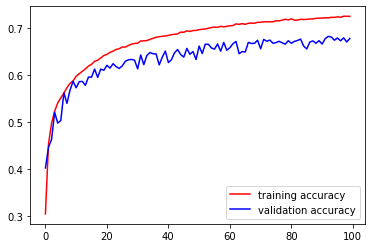

In [46]:
plt.plot(history_3.history['accuracy'],'r')
plt.plot(history_3.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

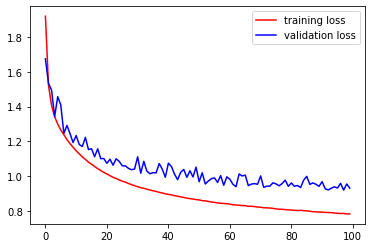

In [47]:
plt.plot(history_3.history['loss'],'r')
plt.plot(history_3.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [48]:
predictions_3 = model.predict_classes(X_test)

## arch 3 large parm

In [20]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(24,1, activation='relu'))

# 14,14
model.add(Convolution2D(64,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

# 12, 12
model.add(Convolution2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, 1, activation='relu'))

model.add(Convolution2D(256,(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(10, 4))

model.add(Flatten())
model.add(Activation('softmax'))


In [21]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_24 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_25 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 15, 15, 24)        792       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 15, 15, 64)       

In [22]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
batch_size=128
epochs=100
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 

print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 65s 1ms/sample - loss: 1.5786 - accuracy: 0.4507 - val_loss: 1.3804 - val_accuracy: 0.5125
Epoch 2/100
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.1060 - accuracy: 0.6114 - val_loss: 1.3714 - val_accuracy: 0.5448
Epoch 3/100
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.9292 - accuracy: 0.6753 - val_loss: 1.0764 - val_accuracy: 0.6262
Epoch 4/100
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.8119 - accuracy: 0.7174 - val_loss: 1.0816 - val_accuracy: 0.6237
Epoch 5/100
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.7203 - accuracy: 0.7519 - val_loss: 1.0177 - val_accuracy: 0.6557
Epoch 6/100
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.6402 - accuracy: 0.7798 - val_loss: 1.0469 - val_accuracy: 0.6598
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.3258 - val_accuracy: 0.7143
Epoch 56/100
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.0059 - accuracy: 1.0000 - val_loss: 1.3341 - val_accuracy: 0.7121
Epoch 57/100
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.3366 - val_accuracy: 0.7133
Epoch 58/100
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.3401 - val_accuracy: 0.7151
Epoch 59/100
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.0055 - accuracy: 1.0000 - val_loss: 1.3439 - val_accuracy: 0.7135
Epoch 60/100
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.0053 - accuracy: 1.0000 - val_loss: 1.3446 - val_accuracy: 0.7120
Epoch 61/100
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.0051 - ac

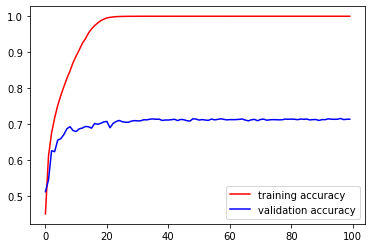

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

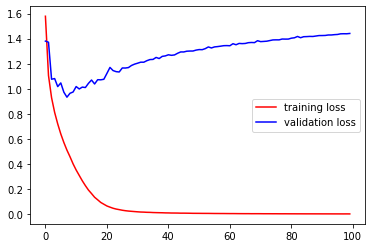

In [26]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [48]:
predictions = model.predict_classes(X_test)

## arch 5 small param with delete layers

In [31]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 32,32
model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())

# 30,30
model.add(MaxPooling2D(pool_size=(2,2)))

# 15,15
model.add(Convolution2D(24,1, activation='relu'))

# 15, 15
model.add(Convolution2D(64,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

# # 12, 12
# model.add(Convolution2D(128,(3,3), activation='relu'))
# model.add(BatchNormalization())

# 15 15
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Convolution2D(64, 1, activation='relu'))

# model.add(Convolution2D(256,(3,3), activation='relu'))
# model.add(BatchNormalization())


model.add(Convolution2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))


In [32]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_38 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_39 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 15, 15, 24)        792       
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 15, 15, 64)       

In [33]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
batch_size=128
epochs=100
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 37s 739us/sample - loss: 1.6336 - accuracy: 0.4435 - val_loss: 1.4680 - val_accuracy: 0.4967
Epoch 2/100
50000/50000 [==============================] - 36s 718us/sample - loss: 1.2410 - accuracy: 0.5620 - val_loss: 1.3200 - val_accuracy: 0.5422
Epoch 3/100
50000/50000 [==============================] - 36s 716us/sample - loss: 1.0971 - accuracy: 0.6174 - val_loss: 1.3995 - val_accuracy: 0.5313
Epoch 4/100
50000/50000 [==============================] - 36s 717us/sample - loss: 1.0024 - accuracy: 0.6485 - val_loss: 1.1040 - val_accuracy: 0.6116
Epoch 5/100
50000/50000 [==============================] - 36s 714us/sample - loss: 0.9312 - accuracy: 0.6765 - val_loss: 1.1225 - val_accuracy: 0.6188
Epoch 6/100
50000/50000 [==============================] - 36s 713us/sample - loss: 0.8752 - accuracy: 0.6961 - val_loss: 1.0208 - val_accuracy: 0.6537
Epoch 7/100
50000/50000 [=============

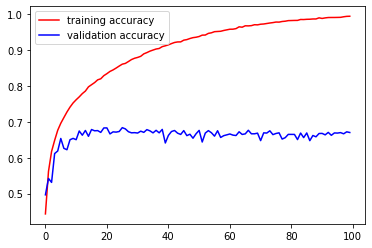

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

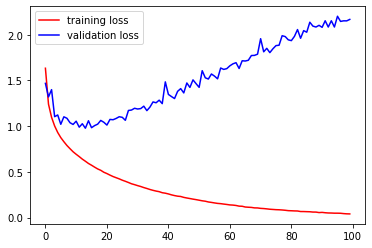

In [36]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [37]:
predictions = model.predict_classes(X_test)